In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

csv_url = "/content/drive/MyDrive/Colab Notebooks/Data/crpto.csv"

In [19]:
def api_run():
  global df_new
  from requests import Request, Session
  from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
  import json

  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'a6585130-9a4d-4f6a-81e8-71420dea77d6',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    # print(data)
    #I have commented this as the 'data' is more than 10mb, so it creates an error
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  df_new = pd.json_normalize(data["data"])
  df_new["timestamp"] = datetime.now()

In [8]:
pd.set_option("display.max.rows", 300)
pd.set_option("display.max.columns", 300)

In [9]:
#Uncomment and Run to create a fresh CSV file

# api_run()
# df_new.drop(df_new.index, inplace=True)
# df_new.to_csv(csv_url,index=False)

<ipython-input-7-d8263f146e80>:29: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df_new["timestamp"] = pd.to_datetime("now")


In [ ]:
import time

#you can set the range for 10,000 and run it for month and then put time.sleep accordingly
for i in range(2):
  api_run()
  df_new.to_csv(csv_url, mode="a", header=False, index=False)
  # time.sleep(60)
  print(f"DF{i} created")


In [24]:
df = pd.read_csv(csv_url)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10414,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.946784e+07,1.946784e+07,False,NaN,1,NaN,NaN,NaN,2023-08-26T00:12:00.000Z,26046.335233,1.233142e+10,-4.1462,0.006845,-0.366523,-0.073820,-11.193532,-13.890885,-3.030578,5.070658e+11,48.2766,5.469730e+11,NaN,2023-08-26T00:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-26 00:14:58.204787
1,1027,Ethereum,ETH,ethereum,7260,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202164e+08,1.202164e+08,True,NaN,2,NaN,NaN,NaN,2023-08-26T00:12:00.000Z,1652.631924,5.347340e+09,4.5200,-0.092960,-0.392813,-0.619307,-11.662617,-11.029152,-9.634885,1.986735e+11,18.9167,1.986735e+11,NaN,2023-08-26T00:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-26 00:14:58.204787
2,825,Tether USDt,USDT,tether,60014,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.285160e+10,8.543926e+10,True,NaN,3,NaN,NaN,NaN,2023-08-26T00:12:00.000Z,0.999522,1.988691e+10,-0.9279,-0.015349,-0.010848,-0.015534,-0.059235,-0.060634,-0.090188,8.281203e+10,7.8843,8.539845e+10,NaN,2023-08-26T00:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-26 00:14:58.204787
3,1839,BNB,BNB,bnb,1576,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538511e+08,1.538511e+08,False,NaN,4,NaN,NaN,NaN,2023-08-26T00:12:00.000Z,218.268567,4.292937e+08,7.8221,0.072468,-0.405977,0.869011,-8.549438,-7.506782,-29.007617,3.358086e+10,3.1974,3.358086e+10,NaN,2023-08-26T00:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-26 00:14:58.204787
4,52,XRP,XRP,xrp,1040,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.291419e+10,9.998849e+10,False,NaN,5,NaN,NaN,NaN,2023-08-26T00:12:00.000Z,0.525384,1.063843e+09,20.9968,-0.136311,1.408045,3.547719,-26.375766,9.671288,11.395817,2.780026e+10,2.6468,5.253839e+10,NaN,2023-08-26T00:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-26 00:14:58.204787


In [38]:
per_change = df.groupby("name")[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
per_change

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
BNB,0.094547,-0.357244,0.922234,-8.557993,-7.474663,-28.977703
Bitcoin,0.019092,-0.334124,-0.056533,-11.181717,-13.944312,-2.967512
Cardano,-0.021909,-1.763122,-1.175556,-14.873593,-6.995138,-28.894674
Dai,-0.030733,0.005435,0.011021,0.046291,0.012400,0.005027
Dogecoin,0.038258,0.171182,-0.537843,-18.802097,-2.519172,-13.142261
Ethereum,-0.071215,-0.352120,-0.642927,-11.668690,-11.069017,-9.577138
Litecoin,-0.130665,0.561768,1.473696,-28.070688,-25.260032,-26.466178
Polkadot,0.194044,1.859575,-0.405063,-14.007291,-10.561334,-15.679338
Polygon,-0.099499,-0.040182,-5.666226,-24.238068,-15.388805,-40.703920


In [40]:
stack = per_change.stack()
df_stack = pd.DataFrame(stack)
df_stack = df_stack.reset_index()
df_stack = df_stack.rename(columns={0:"values", "level_1":"per_change"})
df_stack = df_stack.replace(["quote.USD.percent_change_1h",'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d',"quote.USD.percent_change_90d"],["1h",'24','7d','30d','60d','90d'])
df_stack.head(10)

,name,per_change,values
0,BNB,1h,0.094547
1,BNB,24,-0.357244
2,BNB,7d,0.922234
3,BNB,30d,-8.557993
4,BNB,60d,-7.474663
5,BNB,90d,-28.977703
6,Bitcoin,1h,0.019092
7,Bitcoin,24,-0.334124
8,Bitcoin,7d,-0.056533
9,Bitcoin,30d,-11.181717


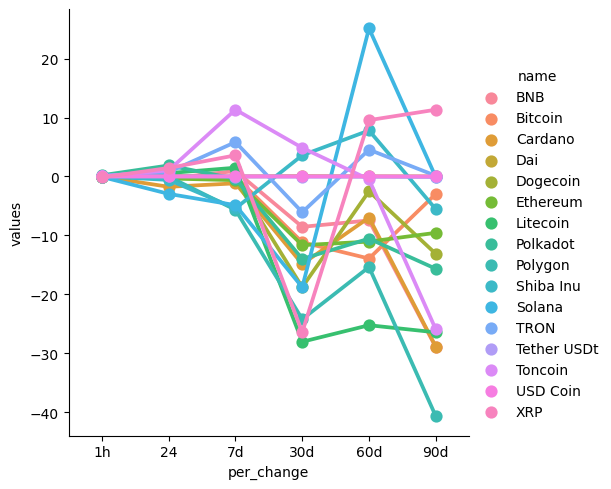

In [41]:
import seaborn as sns
sns.catplot(x="per_change", y="values", hue="name",data=df_stack, kind="point")

In [44]:
temp = df_stack[df_stack['name']=="Bitcoin"]
temp

,name,per_change,values
6,Bitcoin,1h,0.019092
7,Bitcoin,24,-0.334124
8,Bitcoin,7d,-0.056533
9,Bitcoin,30d,-11.181717
10,Bitcoin,60d,-13.944312
11,Bitcoin,90d,-2.967512


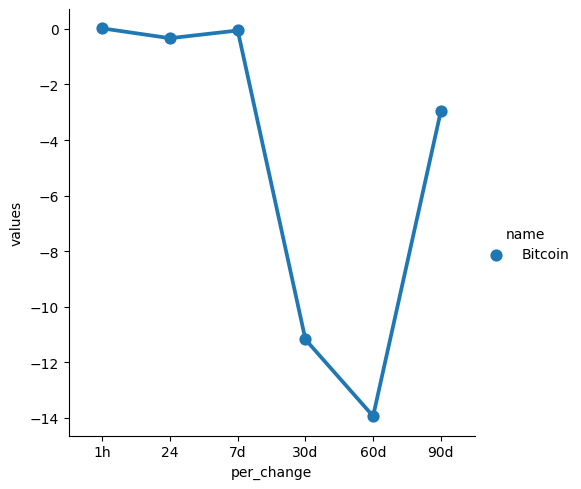

In [43]:
temp = df_stack[df_stack['name']=="Bitcoin"]
sns.catplot(x="per_change", y="values", hue="name",data=temp, kind="point")